<a href="https://colab.research.google.com/github/Payal2000/ARIMA-Monthly-Champagne-Sales/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoregressive Integrated Moving Averages

1. Visualize the Time Series Data
2. Make the time series data stationary
3. PLot the correlation and Auto Correlation Charts
4. Construt ARIMA or Seasonal ARIMA based on the data
5. Use the model to predict the steps



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_url = "https://raw.githubusercontent.com/Payal2000/ARIMA-Monthly-Champagne-Sales/refs/heads/main/perrin-freres-monthly-champagne-.csv"
data = pd.read_csv(file_url)

In [3]:
# Reading first 5 rows
data.head(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [10]:
# Change the column names because they are unclear
data1 = data
data1.head(5)

data1.columns=["Month","Sales"]
data1.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [11]:
# Drop any nulls
data1.dropna(inplace=True)

In [15]:
data1.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


Month is in the form of string format.
Lets convert it into date-time format

In [17]:
data1['Month'] = pd.to_datetime(data1['Month'])
data1

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


ARIMA modeling require a datetime index.



In [18]:
data1.set_index('Month',inplace=True)
data1

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [19]:
data1.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 1: Visualize the Data


<Axes: xlabel='Month'>

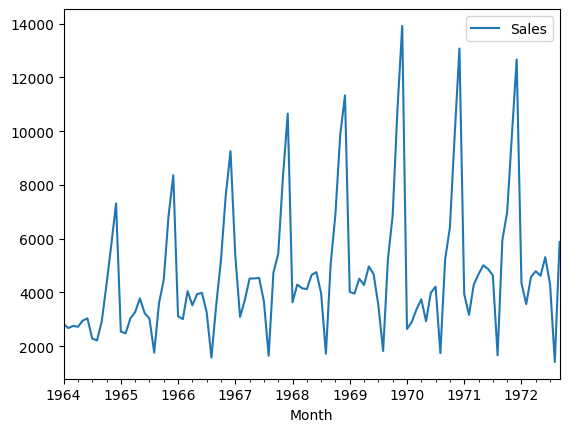

In [20]:
data1.plot()

📈 What the Plot Tells Us:
✅ Characteristics:
1. Trend: Overall upward — sales are increasing over time.

2. Seasonality: Strong yearly cycles — peaks around the same time each year.

3. Variance increases over time — this is common in business sales data.

Why This Matters:

ARIMA assumes a stationary time series (constant mean and variance). From this plot, we can tell:

We’ll need to difference the data (d=1) to remove the trend.

# Test for Stationarity



# ✅ How to Test for Stationarity
1. Visual Inspection
2. Plot the time series
3. Look for trends or seasonality
4. If the mean or spread changes → it's likely non-stationary

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
test_result=adfuller(data1['Sales'])

## 📊 2. Augmented Dickey-Fuller (ADF) Test
The ADF test is a statistical test for stationarity.
It tests the null hypothesis:

H₀ (null): The data is not stationary (has a unit root)

H₁ (alt): The data is stationary



In [23]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [24]:
adfuller_test(data1['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


📊 ADF Test Results Recap:
ADF Statistic: -1.83

p-value: 0.364

Conclusion:
Since p-value > 0.05, we fail to reject the null hypothesis → the time series is non-stationary.

This means the data has:

Trend

Possibly seasonality

Possibly changing variance



# Differencing

We need to transform the series to make it stationary.

1. Apply First Differencing

In [25]:
data1['Sales First Difference'] = data1['Sales'] - data1['Sales'].shift(1)

In [26]:
data1['Sales'].shift(1)

,Sales
Month,
1964-01-01,NaN
1964-02-01,2815.0
1964-03-01,2672.0
1964-04-01,2755.0
1964-05-01,2721.0
...,...
1972-05-01,4788.0
1972-06-01,4618.0
1972-07-01,5312.0


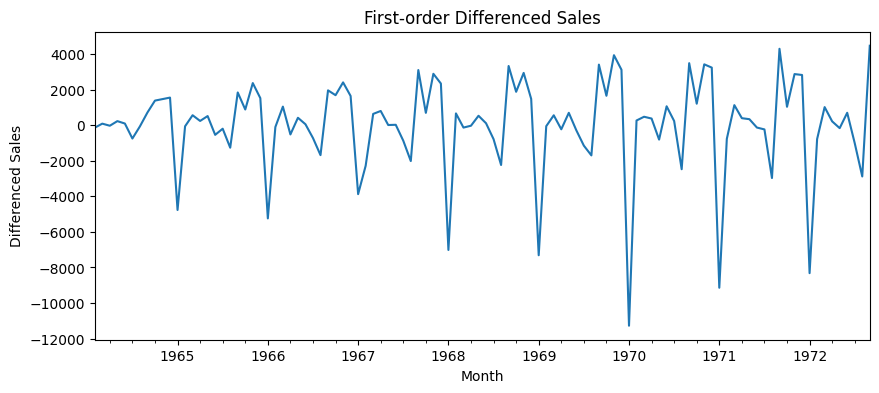

In [27]:
import matplotlib.pyplot as plt

data1['Sales First Difference'].dropna().plot(figsize=(10,4), title="First-order Differenced Sales")
plt.ylabel("Differenced Sales")
plt.show()


In [28]:
data1['Seasonal First Difference']=data1['Sales']- data1['Sales'].shift(12)

In [30]:
data1.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


✅ Why 12?
Because your data is monthly, and a full seasonal cycle (e.g., one year) is 12 months.

💡 What It Removes:
Repeating seasonal patterns

Seasonal trends (like sales increasing every December)

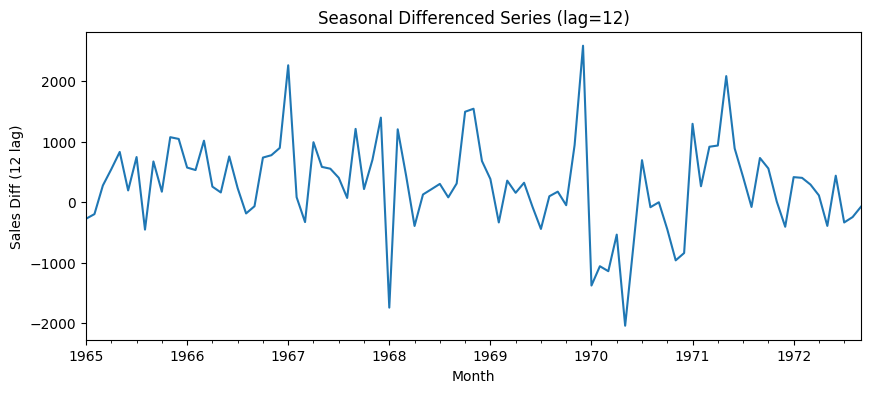

In [34]:
data1['Seasonal First Difference'].dropna().plot(figsize=(10,4), title="Seasonal Differenced Series (lag=12)")
plt.ylabel("Sales Diff (12 lag)")
plt.show()


Improvements:
The trend is gone

Fluctuations are centered around zero

Variance looks more stable (less increasing over time)

This is a good sign — seasonality has been successfully removed!

In [33]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data1['Seasonal First Difference'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


ADF Statistic: -7.626619157213166
p-value: 2.0605796968136632e-11


✅ ADF Test Result Summary:
ADF Statistic: -7.62

p-value: ~2e-11 (basically 0)

✅ Conclusion: The series is now stationary!

This means your seasonal differencing (lag 12) successfully removed trend and seasonality